In [2]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


5


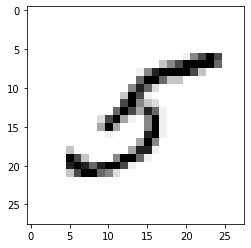

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# save input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


In [7]:
x_train = x_train/255
x_test = x_test/255
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(img_rows, img_cols, 1)))

In [10]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))


In [11]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [13]:
batch_size = 128
epochs = 2

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 138s 295ms/step - loss: 0.1176 - accuracy: 0.9646 - val_loss: 0.0311 - val_accuracy: 0.9893
Epoch 2/2
469/469 [==============================] - 150s 320ms/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0373 - val_accuracy: 0.9881
Test loss: 0.03733769804239273
Test accuracy: 0.988099992275238


In [14]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))